In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull
import phate
import scprep

In [ ]:
def griewank(X):
    X = np.asarray(X)
    j = np.sqrt(np.arange(1, 4))
    term1 = np.sum(X**2, axis=-1) / 4000
    term2 = np.prod(np.cos(X / j), axis=-1)
    return term1 - term2 + 1

def ackley(X):
    X = np.asarray(X)
    d = X.shape[-1]
    sum_sq = np.sum(X**2, axis=-1)
    cos_sum = np.sum(np.cos(2 * np.pi * X), axis=-1)
    return -20 * np.exp(-0.2 * np.sqrt(sum_sq / d)) - np.exp(cos_sum / d) + 20 + np.e

def rastrigin(X):
    X = np.asarray(X)
    A = 10
    D = X.shape[-1]
    return A * D + np.sum(X**2 - A * np.cos(2 * np.pi * X), axis=-1)

def rosenbrock(X):
    X = np.asarray(X)
    return np.sum(100 * (X[..., 1:] - X[..., :-1]**2)**2 + (1 - X[..., :-1])**2, axis=-1)

In [ ]:
# Ackley
load_and_plot("constrained_ackley_Penalty.npy", ackley, "Ackley Optimization with Penalty Enforcement", 1, 100, 10)
load_and_plot("constrained_ackley_Resample.npy", ackley, "Ackley Optimization with Resample Enforcement", 1, 100, 10)
load_and_plot("constrained_ackley_Linear.npy", ackley, "Ackley Optimization with Linear Enforcement", 1, 100, 10)

# Griewank
load_and_plot("constrained_griewank_Penalty.npy", griewank, "Griewank Optimization with Penalty Enforcement", 1, 100, 10)
load_and_plot("constrained_griewank_Resample.npy", griewank, "Griewank Optimization with Resample Enforcement", 1, 100, 10)
load_and_plot("constrained_griewank_Linear.npy", griewank, "Griewank Optimization with Linear Enforcement", 1, 100, 10)

# Rastrigin
load_and_plot("constrained_rastrigin_Penalty.npy", rastrigin, "Rastrigin Optimization with Penalty Enforcement", 1, 100, 10)
load_and_plot("constrained_rastrigin_Resample.npy", rastrigin, "Rastrigin Optimization with Resample Enforcement", 1, 100, 10)
load_and_plot("constrained_rastrigin_Linear.npy", rastrigin, "Rastrigin Optimization with Linear Enforcement", 1, 100, 10)

# Rosenbrock
load_and_plot("constrained_rosenbrock_Penalty.npy", rosenbrock, "Rosenbrock Optimization with Penalty Enforcement", 1, 100, 10)
load_and_plot("constrained_rosenbrock_Resample.npy", rosenbrock, "Rosenbrock Optimization with Resample Enforcement", 1, 100, 10)
load_and_plot("constrained_rosenbrock_Linear.npy", rosenbrock, "Rosenbrock Optimization with Linear Enforcement", 1, 100, 10)

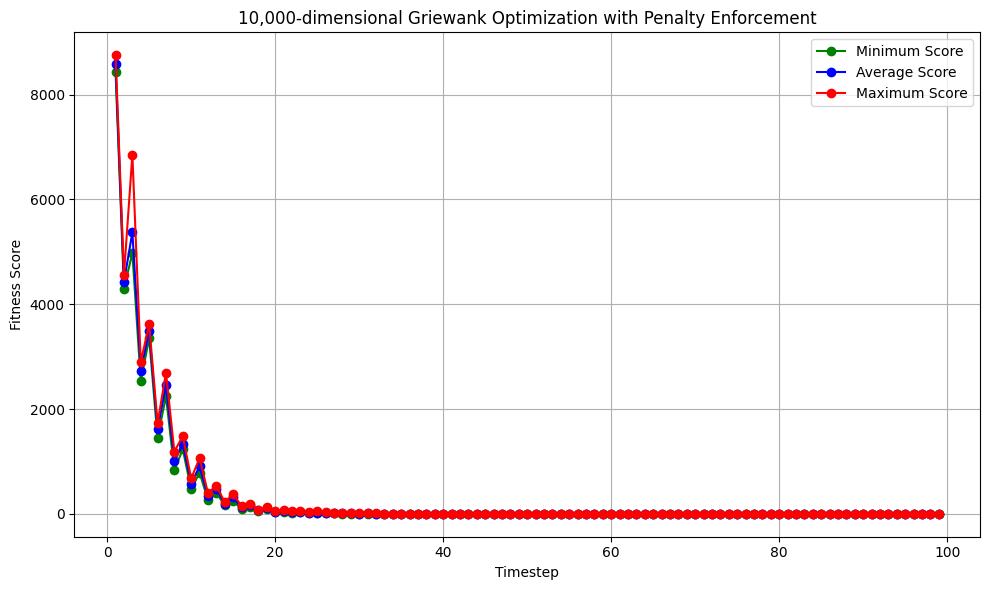

In [55]:
load_and_plot("100_constrained_griewank_Penalty.npy", griewank, "10,000-dimensional Griewank Optimization with Penalty Enforcement", 1, 100, 10, movement=False)

In [14]:
data = np.load("100_constrained_griewank_Linear.npy")
positions = data["positions"]
velocities = data["velocities"]
scores = data["scores"]

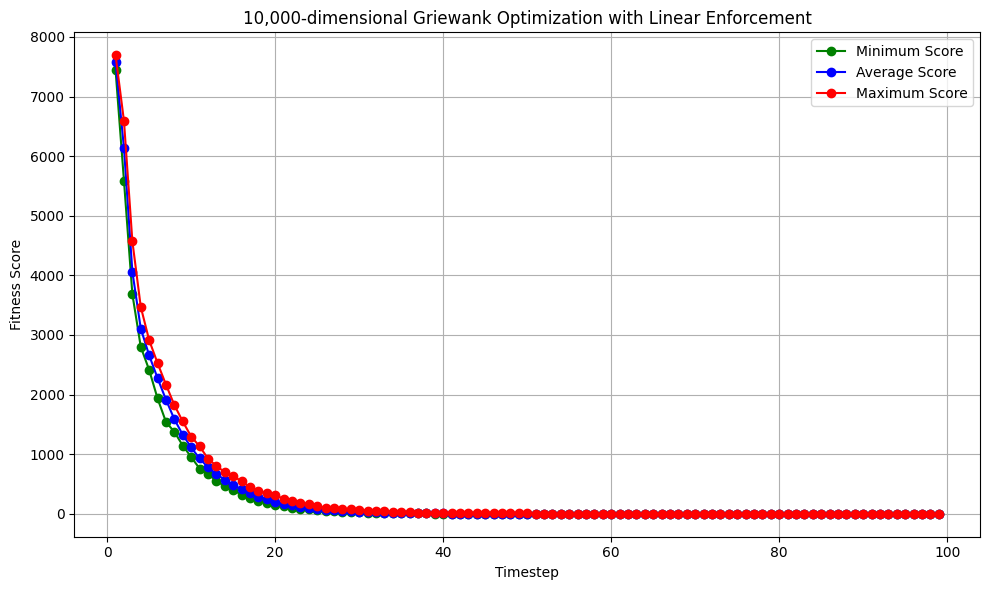

In [15]:
plot_scores(scores, 1, 100, "10,000-dimensional Griewank Optimization with Linear Enforcement")

In [11]:
(T, n, N, K) = positions.shape
reshaped_positions = np.reshape(positions, (T * n, N * K))
time = np.repeat(np.arange(T), n)

In [12]:
phate_op = phate.PHATE()
Y_phate = phate_op.fit_transform(reshaped_positions)

Calculating PHATE...
  Running PHATE on 10100 observations and 10000 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 14.98 seconds.
    Calculating KNN search...
    Calculated KNN search in 8.60 seconds.
    Calculating affinities...


/home/scientist/miniconda3/lib/python3.12/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 100 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated affinities in 6.79 seconds.
  Calculated graph and diffusion operator in 30.53 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 7.99 seconds.
    Calculating KMeans...
    Calculated KMeans in 4.97 seconds.
  Calculated landmark operator in 15.73 seconds.
  Calculating optimal t...
    Automatically selected t = 9
  Calculated optimal t in 21.59 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.88 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.22 seconds.
Calculated PHATE in 73.97 seconds.


/home/scientist/miniconda3/lib/python3.12/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/scientist/miniconda3/lib/python3.12/site-packages/scprep/plot/utils.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


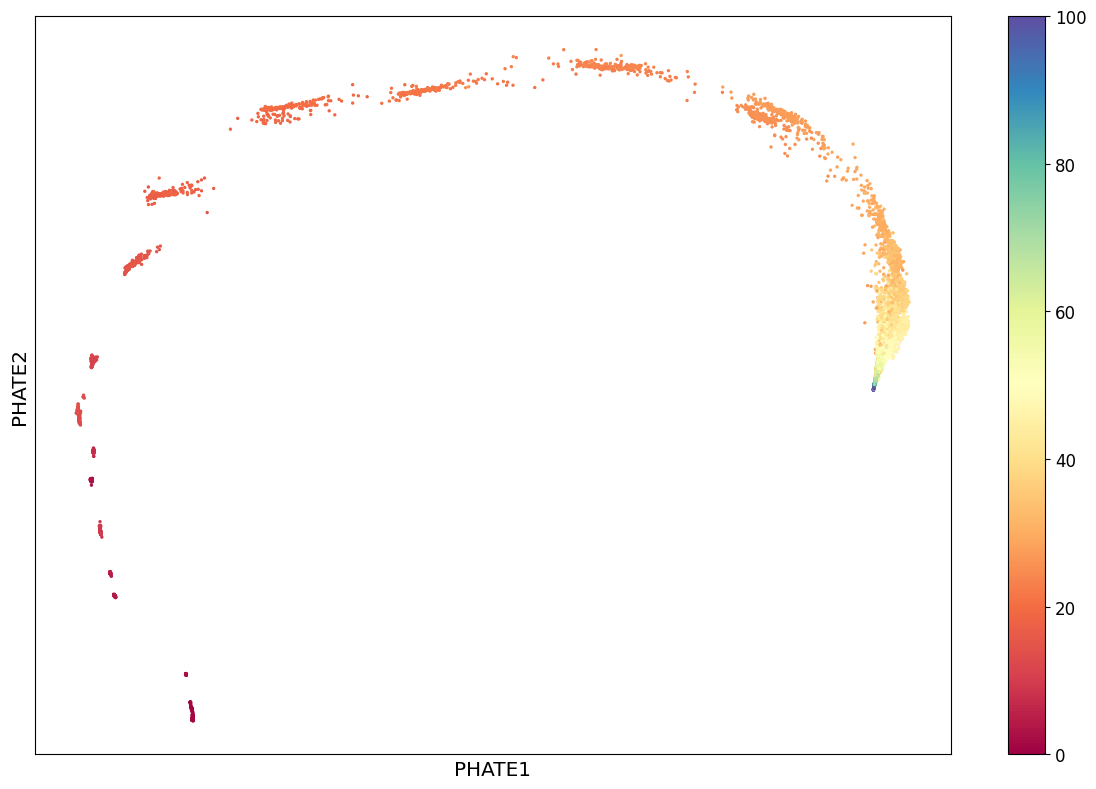

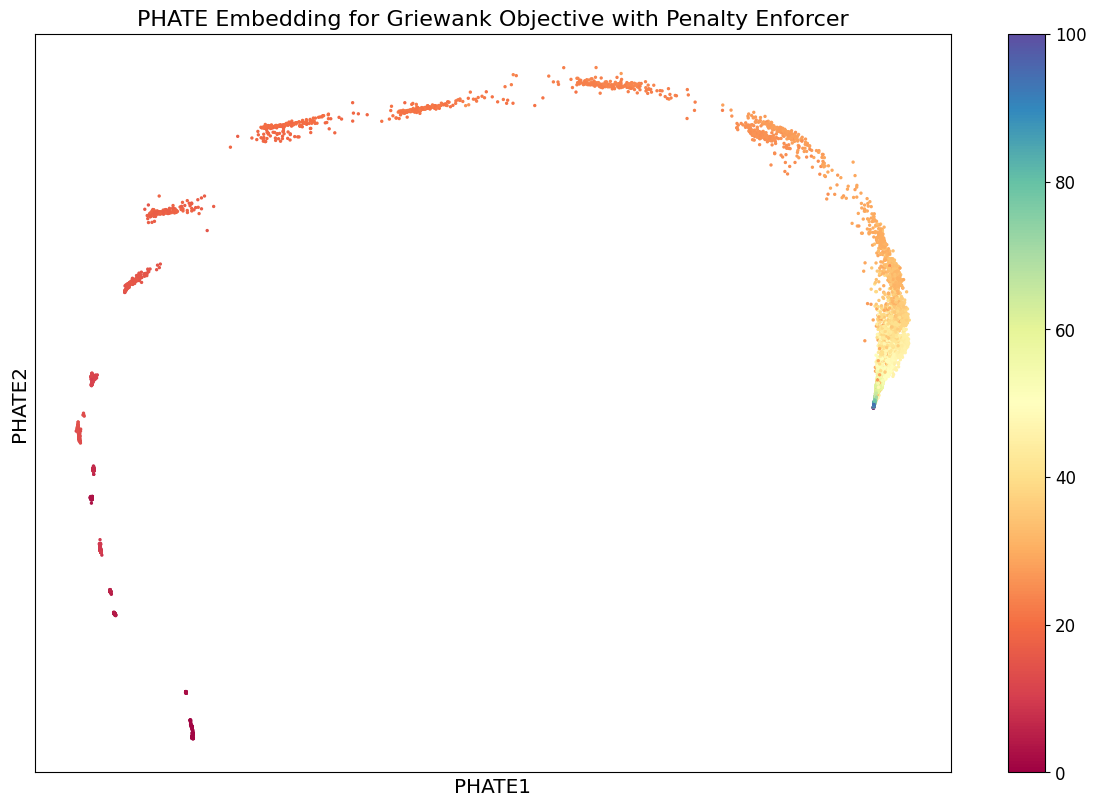

In [13]:
scprep.plot.scatter2d(Y_phate, figsize=(12,8), c=time, cmap="Spectral",
                      ticks=False, label_prefix="PHATE")

scprep.plot.scatter2d(Y_phate, figsize=(12, 8), c=time, cmap="Spectral",
                      ticks=False, label_prefix="PHATE")

plt.title("PHATE Embedding for Griewank Objective with Penalty Enforcer", fontsize=16)
plt.savefig("PHATE_griewank_penalty.png", bbox_inches='tight')

In [4]:
def load_and_plot(file_loc, objective, name, min_t, max_t, fps=10, movement=True):
    # plot_objective(objective, name)

    data = np.load(file_loc)
    positions_og = data["positions"]
    # velocities = data["velocities"]
    scores = data["scores"]

    if movement:
        plot_particle_movement(positions_og, min_t, max_t, name, objective, fps)
    plot_scores(scores, min_t, max_t, name)


def plot_objective(objective, name):
    x = np.linspace(-100, 100, 1000)
    y = np.linspace(-100, 100, 1000)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    # Stack into (n_points, 3)
    points = np.stack([X, Y, Z], axis=-1)

    # Evaluate Griewank
    F = objective(points)

    # Plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, F, cmap='viridis', alpha=0.8, edgecolor='none')
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.set_zlabel(f"{name}(x₁, x₂, 0)")
    ax.set_title(f"{name} Function Slice (x₃ = 0)")

    plt.tight_layout()
    # plt.show()

    plt.savefig(f"{name}_slice.png")

def plot_particle_movement(positions_og, min_t, max_t, name, objective, fps):
    # Trim positions to desired frame range
    positions = positions_og[min_t:max_t, :, :]

    # Setup 2D plot
    fig, ax = plt.subplots()

    # Generate a grid over the XZ plane
    x = np.linspace(-100, 100, 300)
    z = np.linspace(-100, 100, 300)
    X_grid, Z_grid = np.meshgrid(x, z)

    # Create (N, 3) input with Y fixed at 0
    points = np.stack([X_grid, np.zeros_like(X_grid), Z_grid], axis=-1)
    F = objective(points)

    # Plot contours or heatmap
    contour = ax.contourf(X_grid, Z_grid, F, levels=100, cmap='viridis', alpha=0.7)

    # Initial scatter plot for particles
    scat = ax.scatter([], [], color='red', s=20)

    ax.set_xlim(-100, 100)
    ax.set_ylim(-100, 100)
    ax.set_xlabel("X")
    ax.set_ylabel("Z")
    ax.set_title("Timestep 0")

    # Animation update function
    def update(frame):
        pos = positions[frame]
        xz = np.stack([pos[:, 0], pos[:, 2]], axis=-1)  # X and Z
        scat.set_offsets(xz)
        ax.set_title(f"Timestep {frame}")
        return scat,

    # Create animation
    anim = FuncAnimation(fig, update, frames=range(positions.shape[0]), interval=50)

    # Save as GIF
    anim.save(f"particle_motion_with_{name}.gif", writer=PillowWriter(fps=fps))

def plot_scores(scores, min_t, max_t, name):
        # Trim scores to match the animation range
    min_scores = np.min(scores, axis=1)[min_t:max_t]
    max_scores = np.max(scores, axis=1)[min_t:max_t]
    average_scores = np.mean(scores, axis=1)[min_t:max_t]
    timesteps = np.arange(min_t, max_t)

    # Create static scatter plot
    plt.figure(figsize=(10, 6))

    plt.plot(timesteps, min_scores, 'o-', label='Minimum Score', color='green')
    plt.plot(timesteps, average_scores, 'o-', label='Average Score', color='blue')
    plt.plot(timesteps, max_scores, 'o-', label='Maximum Score', color='red')

    plt.xlabel('Timestep')
    plt.ylabel('Fitness Score')
    plt.title(name)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{name}_scores.png', dpi=150)

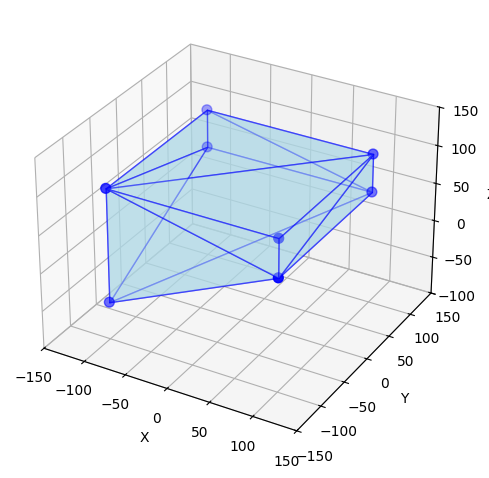

In [9]:
# Define the 8 custom vertices manually
points = np.load("verts.npy")
# Compute the convex hull
hull = ConvexHull(points)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the vertices
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='blue', s=50)

# Plot the convex hull faces
for simplex in hull.simplices:
    face = points[simplex]
    poly = Poly3DCollection([face], alpha=0.5, facecolor='lightblue', edgecolor='blue')
    ax.add_collection3d(poly)

# Set plot limits
ax.set_xlim([-150, 150])
ax.set_ylim([-150, 150])
ax.set_zlim([-100, 150])

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.tight_layout()
plt.show()

In [10]:
points.shape

(8, 3)

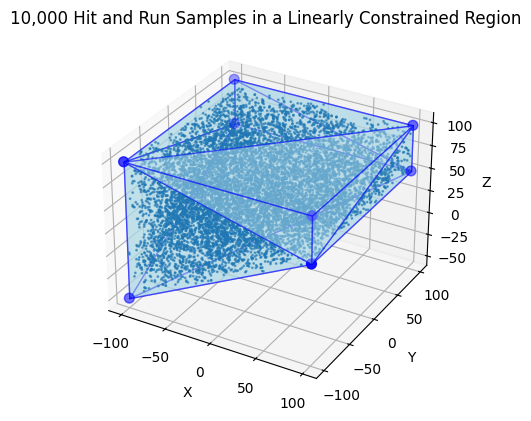

In [11]:
# Define the 8 custom vertices manually
points = np.load("verts.npy")
# Compute the convex hull
hull = ConvexHull(points)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the vertices
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='blue', s=50)

# Plot the convex hull faces
for simplex in hull.simplices:
    face = points[simplex]
    poly = Poly3DCollection([face], alpha=0.5, facecolor='lightblue', edgecolor='blue')
    ax.add_collection3d(poly)

# Scatter plot using the 3 columns as x, y, z
samples = np.load("sample.npy")
ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], s=1, alpha=0.6)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("10,000 Hit and Run Samples in a Linearly Constrained Region")
# plt.show()
plt.savefig("hit_and_run_samples.png")